# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №4 - Метод k-средних, предобработка признаков


###### <hr\>
**Общая информация**

**Срок сдачи:** 28 ноября 2018, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 28 ноября, -4 балла после 06:00 5 декабря, -6 баллов после 06:00 12 декабря, -8 баллов после 19 декабря

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush

Необходимо в slack создать таск в приватный чат:
/todo Фамилия Имя ссылка на гитхаб @alkhamush
Пример:
/todo Ксения Стройкова https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb @alkhamush
Дополнительно нужно просто скинуть ссылку в slack в личный чат

Используйте данный Ipython Notebook при оформлении домашнего задания.

# Имплементация K-means

Пользуясь наработками выше, имплементируйте метод k-means.  
При инициализации необходимо задавать количество кластеров, функцию расстояния между кластерами (для оригинального k-means - евклидово расстояние) и начальное состояние генератора случайных чисел.

После обучения, среди атрибутов класса `Kmeans` должны появится
* Метки кластеров для объектов
* Координаты центройдов кластеров

k-means - это алгоритм **кластеризации**, а не классификации, а посему метод `.predict()` в нем фактически не нужен, но он может возвращать метки ближайшего кластера для объектов.

###### Задание 1 (2 баллов)
Имплементируйте метод k-means. Задание считается выполненным, если Ваша реализация работает быстрее реализации из sklearn.

Теория для выполнения задания 2 и 3 остаётся на самостоятельное изучение. Теории немного и она совсем простая.

###### Задание 2 (2 балла)
Имплементируйте класс MiniBatchKMeans, который является классом наследником Kmeans.

###### Задание 3 (2 балла)
Превратите k-means в k-means++. Для этого нужно реализовать метод в классе Kmeans, который будет инициализировать более "хорошие" значения центроидов. Чтобы использовался метод k-means++, в параметр init необходимо передать строковое значение 'k-means' (по умолчанию 'random').

###### Задание 4 (2 балла)
В пункте "Проверка корректности метода" нужно нарисовать графики, которые показывают зависимость времени выполнения алгоритма от количества сэмплов. Графики должны быть  нарисованы для различных комбинаций реализаций алгоритма (k-means, k-means++, k-means с MiniBatchKMeans, k-means++ с MiniBatchKMeans). График достаточно построить на 5-10 точках.

###### Задание 5 (2 балла)
В пункте "Применение K-means на реальных данных" нужно сравнить различные реализации k-means (k-means, k-means++, k-means с MiniBatchKMeans, k-means++ с MiniBatchKMeans). После чего написать вывод, в котором должно быть объяснение того, почему один алгоритм оказался лучше остальных или почему не было выявлено лучшего алгоритма.

**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw4.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять написанный код и текст. В противном случае -1 балл
<hr\>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

#%load_ext pycodestyle_magic

In [28]:
#%%pycodestyle


class MyKmeans: 
    
    def __init__(self, k=2, metric='euclidean', max_iter=1000, random_state=None, init='random'):
        """
        Инициализация метода
        :k - количество кластеров
        :metric - функция расстояния между объектами
        :max_iter - максиальное количество итераций
        :random_state - seed для инициализации генератора случайных чисел
        """
        
        self.k = k
        self.random_state = random_state
        self.metric = metric
        self.max_iter = max_iter
        self.init = init
    def init_centroids(self, X, y=None):
        if self.init == 'random':
            self.centroids = X[np.random.choice(np.shape(X)[0], \
                                                size=self.k, replace=False)]
            return
        elif self.init == 'k-means':
            self.centroids[0] = X[np.random.randint(0, X.shape[0])]
            for i in range(1, self.k):
                dist = (np.square((X[np.newaxis, :] - \
                                   self.centroids[:i, np.newaxis]))).sum(axis=2)
                min_dist = np.min(dist, axis=0)
                dd = np.sum(min_dist, axis=0)
                probs = min_dist/dd
                self.centroids[i] = X[np.random.choice(X.shape[0],\
                                                       size=1, replace=False, p=probs)]
            return

    def fit(self, X, y=None):
        """
        Процедура обучения k-means
        """
        
        # Инициализация генератора случайных чисел
        np.random.seed(self.random_state)
        
        # Массив с метками кластеров для каждого объекта из X
        self.labels = np.empty(X.shape[0])
        
        # Массив с центройдами кластеров
        self.centroids = np.empty((self.k, X.shape[1]))
        
        ## Your Code Here
        # ...
        old_dist = -1
        self.init_centroids(X, y)
        for i in range(self.max_iter):
            dist = ((X - self.centroids[0]) ** 2).sum(axis=1)
            self.labels = np.zeros(X.shape[0])
            for j in range(self.k - 1):
                distj = ((X - self.centroids[j+1]) ** 2).sum(axis=1)
                mask = dist > distj
                dist[mask] = distj[mask]
                self.labels[mask] = j + 1
            for j in range(self.k):
                mask = self.labels == j
                self.centroids[j] = X[mask].sum(axis=0) / mask.sum()
            if np.sum(np.abs(old_dist - dist) < 0.1):
                return self
            else:
                old_dist = dist
        
        return self

    def predict(self, X, y=None):
        return self.labels, self.centroids
        """
        Процедура предсказания кластера
        
        Возвращает метку ближайшего кластера для каждого объекта
        """

class MiniBatchKmeans(MyKmeans):
    def __init__(self, k=2, metric='euclidean', max_iter=100, random_state=None, \
                 init='random', batch_size=10):

        MyKmeans.__init__(self, k, metric, max_iter, random_state, init)
        self.batch_size = batch_size

    def fit(self, X, y=None):
        np.random.seed(self.random_state)
        self.labels = np.empty(X.shape[0])
        self.centroids = np.empty((self.k, X.shape[1]))

        self.init_centroids(X, y)
        for i in range(self.max_iter):
            np.random.shuffle(X)
            d = X[:self.batch_size]
            dist = ((d - self.centroids[0]) ** 2).sum(axis=1)
            labels = np.zeros(d.shape[0])
            for j in range(self.k - 1):
                distj = ((d - self.centroids[j+1]) ** 2).sum(axis=1)
                mask = dist > distj
                dist[mask] = distj[mask]
                labels[mask] = j + 1
            for j in range(self.k):
                mask = labels == j
                mask_s = mask.sum()
                if(mask_s == 0):
                    continue
                C_ = d[mask].sum(axis=0) / mask.sum()
                self.centroids[j] = (1 - 1 / (i + 1)) * self.centroids[j] + \
                    1 / (i + 1) * C_

        return self

    def predict(self, X, y=None):
        for i in range(X.shape[0]):
            dists =((self.centroids - X[i])**2).sum(axis = 1)
            self.labels[i] = dists.argmin()
        return self.labels, self.centroids
     

### Проверка корректности метода

Перед тем как применять алгоритм на реальных данных, нужно испытать его на простых "игрушечных" данных.

Если алгоритм реализован правильно, то метод должен идеально разбивать на 3 кластера данные ниже. Проверьте это.

ВНИМАНИЕ! Проверка должна быть осуществлена на всех реализациях, иначе реализация не будет зачтена!

In [3]:
from sklearn.datasets import make_blobs

In [4]:
X, y = make_blobs(n_samples=100, n_features=2, centers=3, cluster_std=1, 
           center_box=(-10.0, 10.0), shuffle=False, random_state=1234)
X.shape

(100, 2)

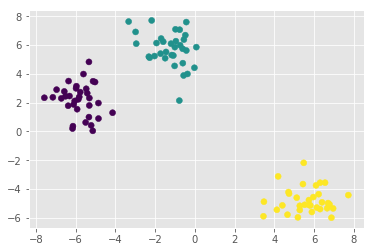

In [5]:
plt.scatter(X[:,0], X[:, 1], c=y)

Проверьте Вашу имплементацию на простых данных (без этого пункта ДЗ не считается выполненным).   
КОММЕНТАРИИ НЕ СТИРАТЬ!

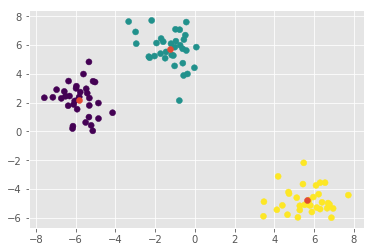

In [6]:
## Работоспособность MyKmeans
clf = MyKmeans(k = 3, random_state = 10)
clf.fit(X)
pred, cen = clf.predict(X)
plt.scatter(X[:,0], X[:, 1], c=pred)
plt.scatter(cen[:, 0], cen[:,1])

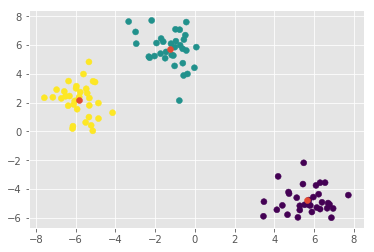

In [7]:
## Работоспособность MyKmeans++
clf = MyKmeans(k=3, random_state=13, init = "k-means")
clf.fit(X)
pred, cen = clf.predict(X)
plt.scatter(X[:,0], X[:, 1], c=pred)
plt.scatter(cen[:, 0], cen[:,1])

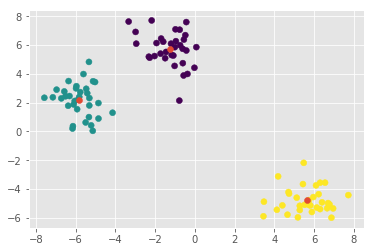

In [8]:
## Работоспособность MyKmeans с MiniBatchMyKmeans
clf = MiniBatchKmeans(k = 3, random_state = 1234, init = 'random')
clf.fit(X)
pred, cen = clf.predict(X)
plt.scatter(X[:,0], X[:, 1], c=pred)
plt.scatter(cen[:, 0], cen[:,1])

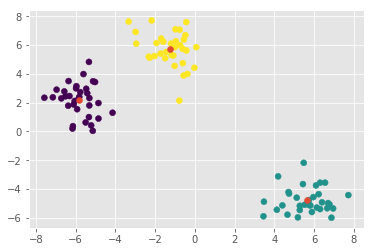

In [9]:
## Работоспособность MyKmeans++ с MiniBatchMyKmeans
clf = MiniBatchKmeans(k = 3, random_state = 100, init = "k-means")
clf.fit(X)
pred, cen = clf.predict(X)
plt.scatter(X[:,0], X[:, 1], c=pred)
plt.scatter(cen[:, 0], cen[:,1])

In [10]:
import time
def tim(clf):
    times = []
    points = np.array([100,1000, 5000, 10000, 15000])
    for i in points:
        t = 0
        for j in range(20):
            start = time.time()
            X, y = make_blobs(n_samples=i, n_features=2, centers=3, cluster_std=1, 
               center_box=(-10.0, 10.0), shuffle=False, random_state=1234)
           
            clf.fit(X, y)
            t += time.time() - start
        t /= 20
        times.append(t)
    plt.plot(points, times)

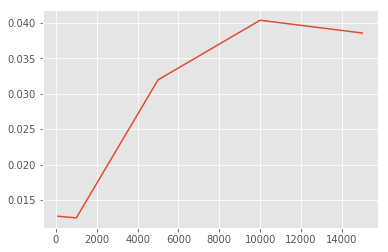

In [11]:
## Время выполнения алгоритма Kmeans из sklearn
from sklearn.cluster import KMeans
clf = KMeans(n_clusters=3, max_iter=1000, random_state=1234, init='random')
tim(clf)

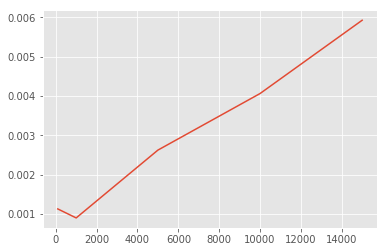

In [27]:
## Время выполнения алгоритма MyKmeans
clf = MyKmeans(k = 3, random_state = 10)
tim(clf)

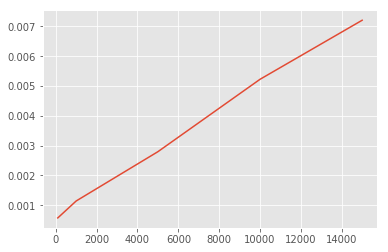

In [13]:
## Время выполнения алгоритма MyKmeans++
clf = MyKmeans(k=3, random_state=13, init = "k-means")
tim(clf)

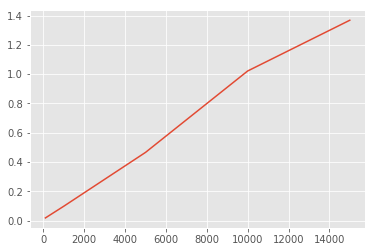

In [16]:
## Время выполнения алгоритма MyKmeans с MiniBatchMyKmeans
clf = MiniBatchKmeans(k = 3, random_state = 1234, init = 'random')
tim(clf)

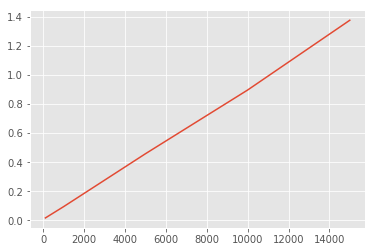

In [17]:
## Время выполнения алгоритма  MyKmeans++ с MiniBatchMyKmeans
clf = MiniBatchKmeans(k = 3, random_state = 1234, init = 'k_means')
tim(clf)

# Применение K-means на реальных данных

Загрузите [данные](https://github.com/brenden17/sklearnlab/blob/master/facebook/snsdata.csv) в которых содержится описание интересов профилей учеников старшей школы США.  (без этого пункта задание не считается выполненным).   
ВНИМАНИЕ! Проверка должна быть осуществлена на всех реализациях, иначе реализация не будет зачтена!

In [18]:
df_sns = pd.read_csv('snsdata.csv', sep=',')
df_sns.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [19]:
df_sns.shape
X = df_sns.iloc[:, 4:].values
X = (X - X.mean(axis=0))/X.std(axis=0)

X

array([[-0.33221726, -0.35769737, -0.2428741 , ..., -0.26153016,
        -0.22040264, -0.1749076 ],
       [-0.33221726,  1.06004883, -0.2428741 , ..., -0.26153016,
        -0.22040264, -0.1749076 ],
       [-0.33221726,  1.06004883, -0.2428741 , ...,  2.02790809,
        -0.22040264, -0.1749076 ],
       ...,
       [-0.33221726,  1.06004883, -0.2428741 , ..., -0.26153016,
        -0.22040264, -0.1749076 ],
       [-0.33221726, -0.35769737, -0.2428741 , ..., -0.26153016,
        -0.22040264, -0.1749076 ],
       [ 2.15319868, -0.35769737, -0.2428741 , ..., -0.26153016,
        -0.22040264, -0.1749076 ]])

Данные устроены так: 
* Год выпуска
* Пол
* Возраст
* Количество друзей
* 36 ключевых слов, которые встречаются в профилe facebook (интересы, сообщества, встречи)

* Удалите все признаки кроме 36 ключевых слов.
* Нормализуйте данные - из каждого столбца вычтите его среднее значение и поделите на стандартное отклонение.
* Используйте метод k-means чтобы выделить 9 кластеров
* Попробуйте проинтерпретировать каждый кластер проанализировав полученные центройды (Некоторые кластеры могут быть очень большие и очень маленькие - плохо интерпретируются)   
КОММЕНТАРИИ НЕ СТИРАТЬ!

In [20]:
def f(clf):
    clf.fit(X)
    pred, cen = clf.predict(X)
    temp = df_sns
    temp.loc[:, 'label'] = pred
    temp.label.value_counts()
    for c, group in temp.groupby('label'):
        print('Cluster: {}'.format(c))
        print(group.iloc[:, 4:-1].mean().nlargest(5))
        print('=' * 10 + '\n')

In [21]:
# sklearn для сравнения 
kmeans = KMeans(n_clusters=9, init='k-means++', max_iter=2000, random_state=123)
kmeans.fit(X)
labels = kmeans.labels_
df_sns.loc[:, 'label'] = labels
for c, group in df_sns.groupby('label'):
    print('Cluster: {}'.format(c))
    print(group.iloc[:, 4:-1].mean().nlargest(5))
    print('=' * 10 + '\n')

Cluster: 0
music         1.066521
dance         1.051033
shopping      0.890191
cute          0.828435
basketball    0.722597
dtype: float64

Cluster: 1
drunk    1.409873
music    0.707554
hair     0.629020
god      0.522064
dance    0.439043
dtype: float64

Cluster: 2
band        4.105053
marching    1.418883
music       1.215426
god         0.505319
dance       0.464096
dtype: float64

Cluster: 3
soccer      4.901004
music       0.773314
shopping    0.499283
god         0.469154
hair        0.440459
dtype: float64

Cluster: 4
music       0.554035
god         0.311626
dance       0.230423
hair        0.192419
shopping    0.181632
dtype: float64

Cluster: 5
blonde    327.0
sex        22.0
hair       12.0
god        10.0
die         6.0
dtype: float64

Cluster: 6
hair      3.475177
sex       2.760047
music     2.374704
kissed    1.874704
die       1.269504
dtype: float64

Cluster: 7
god       4.725322
church    2.180258
jesus     2.049356
music     1.066524
bible     0.972103
dtype: flo

In [22]:
## MyKMeans
clf = MyKmeans(k = 9, random_state = 10)
f(clf)

Cluster: 0.0
hot         1.389116
music       0.740136
hair        0.632200
shopping    0.576871
cute        0.529705
dtype: float64

Cluster: 1.0
hair     3.510817
music    2.695913
sex      1.723558
cute     1.610577
dance    1.379808
dtype: float64

Cluster: 2.0
sex       9.049383
hair      6.098765
blonde    5.012346
music     4.148148
die       3.358025
dtype: float64

Cluster: 3.0
church        4.321755
god           2.689214
jesus         1.029250
music         0.987203
basketball    0.787934
dtype: float64

Cluster: 4.0
music         0.427731
god           0.222422
shopping      0.215991
cute          0.183453
basketball    0.178712
dtype: float64

Cluster: 5.0
soccer        3.557175
sexy          1.149103
music         0.819507
sports        0.668161
basketball    0.618834
dtype: float64

Cluster: 6.0
dance       2.276348
music       0.762255
shopping    0.674020
hair        0.553922
cute        0.532782
dtype: float64

Cluster: 7.0
band        6.056782
marching    2.151420
mu

In [23]:
## MyKMeans++
clf = MyKmeans(k=9, random_state=1234, init = "k-means")
f(clf)


Cluster: 0.0
die      4.174721
music    1.163569
hair     1.074349
god      1.052045
death    0.847584
dtype: float64

Cluster: 1.0
dance    4.668493
drunk    1.780822
music    1.068493
hair     0.797260
cute     0.684932
dtype: float64

Cluster: 2.0
hair      3.641452
sex       3.004539
kissed    2.472012
music     2.217852
rock      1.119516
dtype: float64

Cluster: 3.0
hair        1.145795
music       0.890397
shopping    0.671602
dance       0.645075
cute        0.624306
dtype: float64

Cluster: 4.0
hollister      2.222561
abercrombie    1.551829
shopping       1.192073
hair           1.182927
music          1.036585
dtype: float64

Cluster: 5.0
softball      8.009804
blonde        3.392157
basketball    1.176471
music         0.921569
god           0.872549
dtype: float64

Cluster: 6.0
band        3.553672
hot         1.655367
marching    1.241055
music       1.195857
dance       0.670433
dtype: float64

Cluster: 7.0
music         0.520984
god           0.263245
dance         0.25

In [24]:
## MyKMeans с MiniBatchMyKMeans
clf = MiniBatchKmeans(k = 9, random_state = 1234, init = 'random')
f(clf)

Cluster: 0.0
music       0.743644
god         0.444915
dance       0.438559
hair        0.432203
shopping    0.394068
dtype: float64

Cluster: 1.0
music         0.500000
basketball    0.435484
dance         0.403226
god           0.387097
hair          0.370968
dtype: float64

Cluster: 2.0
music       0.731034
dance       0.417625
god         0.415709
hair        0.403065
shopping    0.323372
dtype: float64

Cluster: 3.0
music         0.773333
god           0.600000
basketball    0.413333
shopping      0.400000
cute          0.386667
dtype: float64

Cluster: 4.0
music    0.789041
dance    0.494521
hair     0.472603
god      0.424658
band     0.373973
dtype: float64

Cluster: 5.0
music       0.705054
god         0.449136
dance       0.394114
hair        0.378119
shopping    0.357006
dtype: float64

Cluster: 6.0
music       0.776812
dance       0.521739
hair        0.501449
band        0.466667
shopping    0.431884
dtype: float64

Cluster: 7.0
music       0.739955
god         0.472580
ha

In [25]:
## MyKMeans++ с MiniBatchMyKMeans
clf = MiniBatchKmeans(k = 9, random_state = 100, init = "k-means")
f(clf)

Cluster: 0.0
music    0.631915
hair     0.434043
god      0.427660
dance    0.421277
cute     0.363830
dtype: float64

Cluster: 1.0
music       0.715909
god         0.447727
shopping    0.388636
hair        0.379545
band        0.356818
dtype: float64

Cluster: 2.0
music       0.705216
god         0.446200
dance       0.432489
hair        0.393741
shopping    0.347243
dtype: float64

Cluster: 3.0
band        6.0
church      3.0
football    2.0
music       2.0
god         2.0
dtype: float64

Cluster: 4.0
music       0.745723
god         0.471460
hair        0.428142
dance       0.425855
shopping    0.353743
dtype: float64

Cluster: 5.0
music       0.761155
god         0.451444
dance       0.426072
hair        0.412948
shopping    0.334208
dtype: float64

Cluster: 6.0
music       0.753181
god         0.384224
shopping    0.381679
dance       0.376590
hair        0.368957
dtype: float64

Cluster: 7.0
dance       0.7125
music       0.7125
god         0.6000
hair        0.5125
shopping    0

In [26]:
## Вывод
# 1) Кластеры MyKMeans мне показались довольно адекватными и схожими с
# skilearn- овскими класстерами
# 2) Кластеры MyKMeans++ мне показались странными
# 3) MiniBatch странно кластеризировал, т.к. везде есть music, но у skilearn тоже в 8 из 9 класстеров
#    есть music
# 4) В целом все реализации, как мне кажется, показали себя хорошо
#
#